<img src="Kahoot_Logo.svg.png">

In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = '+'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

# Who are our users? 
A closer look at the user base of Kahoot...

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
from wordcloud import WordCloud
hide_toggle()

In [3]:
path = "/home/adrian/test/Kahoot-challenge/data/part_3/users.csv"
df_users = pd.read_csv(path,index_col=["user_id"])
hide_toggle()

### Where are they from?

In [4]:
print(f"Kahoot was played in {df_users.country.unique().shape[0]} countries within the selected week ! ")
hide_toggle()

Kahoot was played in 100 countries within the selected week ! 


##### Kahoot truly is a global company, with players spanning the United States, all through Europe, India, Asia and even Greenland! 

##### However, there are big differences when it comes to what countries Kahoot really stands out.. Let us have a closer look at how countries rank by number of users:

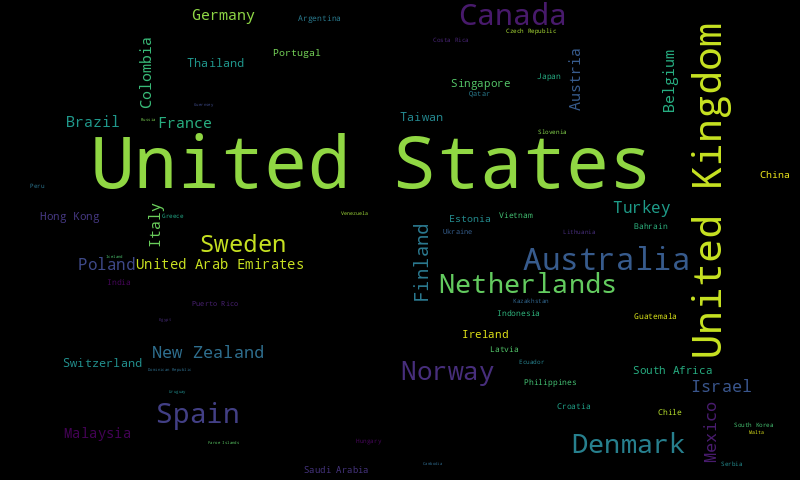

In [5]:
wc = WordCloud(background_color='black', width=800, height=480)
wc.fit_words(df_users.country.value_counts().to_dict())
wc.to_image().show()
hide_toggle()

##### The figure above shows how countries are ranked by number of users. The top countries are typically well developed western countries who speaks English either as a first or second language. The UK, Australia and Canada and all the nordic countries are also among our top Kahooters.

##### This figure does however not illustrate the ratio of users...

##### Below are two lists, one showing the most active countries by number of users, and one showing the least active countries during this specific week.

10 Most active countries: country
United States     6017
United Kingdom     612
Australia          335
Canada             321
Spain              269
Netherlands        252
Denmark            243
Norway             224
Sweden             189
Finland            117
dtype: int64

10 least active countries: country
Cayman Islands    1
Panama            1
Sudan             1
Curaçao           1
Morocco           1
Greenland         1
Nicaragua         1
Oman              1
Pakistan          1
Isle of Man       1
dtype: int64


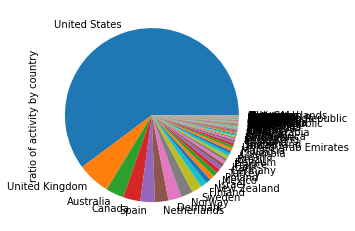

In [6]:
country_activity = df_users.groupby("country").size().sort_values(ascending=False)
print(f"10 Most active countries: {country_activity[:10]}\n\n10 least active countries: {country_activity[-10:]}")
fig = country_activity.plot.pie(label="ratio of activity by country")
fig.plot()
hide_toggle()

##### The pie chart shows that US is by far our biggest player, with more than half our users within a given week. Other well developed western countries who speaks english, like the UK, Australia and Canada and all the nordic countries are also among our top Kahooters, but they are still far away from having the same user base.

### What type of users are there? 

##### Looking away from what country our users are from, we categorize them into 4 different types of users:

In [7]:
print("types of users: \n")
for user_type in df_users.primary_usage.unique():
    if(type(user_type)!= str):
        continue
    print(user_type)
hide_toggle()

types of users: 

teacher
social
student
business


##### Looking at the ratio of the different user types tells a clear story:

Ratio of users, grouped by user type:


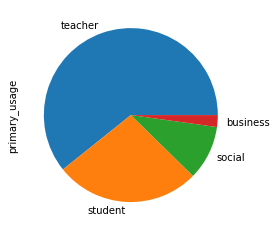

In [8]:
print("Ratio of users, grouped by user type:")
df_users.primary_usage.value_counts().plot.pie().plot()
hide_toggle()

##### Teachers dominate among our users, covering more than half the users within a week, with students coming in at a strong second. 

##### The educational use of Kahoot thus shows to be the strongest force driving Kahoot

### How do they use Kahoot?

##### Among our users, many of them are there just to play / attend, while others put a lot of effort into creating content for others. With a median of 2 Kahoots created for a random user, and over 15% of the users never having created a Kahoot themselves.  

In [9]:
print("percentage of users who never created a kahoot:")
print(df_users[df_users.my_kahoots_count ==0].index.shape[0]/ df_users.index.shape[0]*100)
hide_toggle()

percentage of users who never created a kahoot:
15.8


##### There are some users that really loves making kahoots, reaching up to values as high as 300+ kahoots created. These top creators are teachers, with a way higher engagement regarding creation of Kahoots.

In [10]:
print("Overview of stats of Kahoots created by teachers")
print(df_users[df_users["primary_usage"]=="teacher"].my_kahoots_count.describe())
hide_toggle()

Overview of stats of Kahoots created by teachers
count    5461.000000
mean       12.578649
std        20.131852
min         0.000000
25%         1.000000
50%         6.000000
75%        16.000000
max       326.000000
Name: my_kahoots_count, dtype: float64


In [11]:
print("Overview of stats of Kahoots created by non teachers:")
print(df_users[df_users["primary_usage"]!="teacher"].my_kahoots_count.describe())
hide_toggle()

Overview of stats of Kahoots created by non teachers:
count    3531.000000
mean        1.864911
std         3.088155
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        42.000000
Name: my_kahoots_count, dtype: float64



##### Teachers stand for over 91% of Kahoots created... Indicating that there truly is a Kahoot for the creator, and a Kahoot for the attenders...

In [12]:
print("Percentage of how many Kahoots were created by teachers:")
print(df_users[df_users["primary_usage"]=="teacher"].my_kahoots_count.sum()/df_users.my_kahoots_count.sum())
hide_toggle()

Percentage of how many Kahoots were created by teachers:
0.9125230814192914


##### Kahoot definetely has 1 type of users that can be considered a power user, using Kahoot in a specific way, creating lots of content for others. 

##### Meanwhile, the result of what these power users create are consumed by the other side (those consuming / attending the quiz..)

##### One side of the product development is thus to create a great platform for the creators, and the other part is to make it interesting and enjoyable for the attendees. 

##### An impressive 97% of games joined by all users were created by teachers.... Strengthening that Kahoot is an educational platform more so than entertainment.   

In [13]:
print("Percentage of how many games that were joined, were created by teachers:")
print(df_users[df_users["primary_usage"]=="teacher"].my_kahoots_players_joined_count.sum()*100 / df_users.my_kahoots_players_joined_count.sum())
hide_toggle()

Percentage of how many games that were joined, were created by teachers:
97.49614707838771


### Why do they sign up? 

In [14]:
print("Top 20 signup domains")
print("domain: \tcount:")
print(df_users.initial_referring_domain.value_counts()[:20])
hide_toggle()

Top 20 signup domains
domain: 	count:
www.google.com          2374
kahoot.it               1962
getkahoot.com            948
create.kahoot.it         487
www.google.co.uk         291
www.bing.com             265
kahoot.com               244
classroom.google.com     224
www.google.ca            143
www.google.com.au        131
www.google.es            122
www.google.dk            107
www.google.nl            105
www.google.se             90
www.google.no             74
www.google.fi             48
search.yahoo.com          48
www.google.co.il          44
www.google.co.nz          40
www.google.com.tr         38
Name: initial_referring_domain, dtype: int64


##### Most of the users signs up for Kahoot through google and other search engines. But a lot of our traffic also comes straight from own websites, such as kahoot.it and create.kahoot.it, suggesting that the user is somewhat familiar with the product when signing up. An interesting find is that the "info/marketing page" kahoot.com is way less frequenct than kahoot.it / create.kahoot.it, which CAN indicate that a user is not very likely to sign up just because he / she "stumbled" upon Kahoot, but is already familiar with the product when signing up.

### Do they come and go?

##### Many apps struggles with either keeping users engaged over a longer period, and / or attracting new users...

In [15]:
def convert_date(row):
    try:
        return "-".join(row.split("-")[:2])
    except:
        return ""
df_users.created = df_users.created.apply(convert_date)
hide_toggle()

##### Grouping users by year and month, gives us this top 10 list of year and month driving the most users: 

In [16]:
print(df_users.groupby("created").size().sort_values(ascending=False)[:10])
hide_toggle()

created
2017-05    2802
           1032
2017-04     627
2017-03     423
2016-09     335
2016-11     305
2017-02     296
2016-10     275
2016-12     257
2017-01     246
dtype: int64


##### Most of the users are from the current month, but there is definitely a tail from users that registered the previous months, and keeps playing. 

In [17]:
def convert_date_to_year(row):
    try:
        return row.split("-")[0]
    except:
        return ""
df_users.created = df_users.created.apply(convert_date_to_year)
hide_toggle()

Ratio of when active users created their accounts...


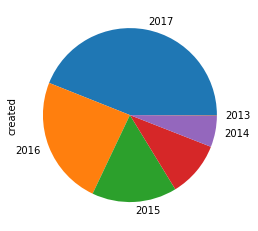

In [18]:
print("Ratio of when active users created their accounts...")
df_users.created.value_counts().plot.pie().plot()
hide_toggle()

#### Looking at the pie chart above, one can see that a lot of the users created their accounts a long time ago. Looking at those users that registered at least 6 months ago we find that they account for about 53% of the active users!

In [19]:
print("Percentage of users active this week, that registered more than 6 months ago: ")
old_users = df_users[df_users["created"] <= "2016-11"]
print(100* old_users.shape[0]/ df_users.shape[0])
hide_toggle()

Percentage of users active this week, that registered more than 6 months ago: 
56.03


##### This is highly valuable, indicating that there is a great mixture between new users, and older users that have found good use of the product...

##### Looking closer at this data, it turns out that teachers finds high value in the product, and becomes engaging users that stays. More than 75% of the "old" users are teachers..

Ratio of types of "old" users


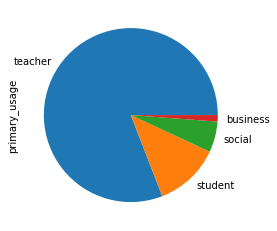

In [20]:
print('Ratio of types of "old" users')
old_users.primary_usage.value_counts().plot.pie().plot()
hide_toggle()

##### This resonates well with the thoughts about teacher's being power users, and that Kahoot has built a product that delivers value to educational environments..

I could keep diving into data for quite some time, looking at differences between app-usage and browser usage, raising and answering new questions, but this case challenge has been pretty time extensive. Let's summarize....

## Summary/Conclusion

Kahoot is a global company, reaching users in more than 100 countries. But even though the reach is big, the western market dominates, with US being the biggest. 

There are four types of users:
* teachers
* students
* social
* business

But we can divide them on an even more abstract level:
* creators
* players / attenders

Most of the active users are teachers, and most of the content available on Kahoot is created by teachers. Around 97% of the users that joined a Kahoot, joined a Kahoot created by a teacher. So even if "social" is a type of user, the type of games played are weighted towards the educational.
However, this mix of social and educational CAN indicate that the user base is interested in involving more "fun" in learning. 

Teachers are the power users off Kahoot, and I would guess (my intuition only) that most of the revenue Kahoot generates are from teachers, in the US. 

Users mostly sign up because they have a direct motivation (joining a game, or creating a kahoot), which indicates that they have prior knowledge to what Kahoot is when signing up. 

Kahoot has a good mix of new users and users that have stayed with the product for a long time. A huge ratio of the old users (>75%) are teachers. More than half of the active users for the given week had signed up atleast 6 months ago, with some dating as far back as 2013....

Having such a mix indicates that Kahoot has a valuable product, with the potential to grow further with the correct efforts... 

Extra: 

Looking into the reach of the most "popular" users, the largest audience a Kahooter has reached out to is 26.000 users.  
This tells me that the users aren't doing this for engagement with just about anyone (like on youtube / tiktok), but that the users are interested in providing something to a "closer" social circle. I imagine these top "popular" kahooters are teachers at universities that have lectures with many hundred students each class. This is supported by looking at the top performing user, a teacher from Oxford, who has been a Kahooter since 2014...

In [21]:
df_users.my_kahoots_players_joined_count.sort_values(ascending=False)[:100]

user_id
1779    26059.0
9989    21294.0
4617    19411.0
5836    19350.0
462     18419.0
         ...   
9114     5529.0
5012     5479.0
3171     5473.0
1627     5472.0
2335     5420.0
Name: my_kahoots_players_joined_count, Length: 100, dtype: float64

In [22]:
df_users.iloc[1778]

city                                             Oxford
country                                   United States
device                                              Mac
device_type                                         Mac
dma                                      Birmingham, AL
language                                        English
browser                                       Chrome 53
region                                          Alabama
created                                            2014
initial_referring_domain                 www.google.com
initial_utm_campaign                                NaN
initial_utm_content                                 NaN
initial_utm_medium                                  NaN
initial_utm_source                                  NaN
kahoots_favourited_by_me_count                      2.0
kahoots_shared_with_me_count                        0.0
my_kahoots_answers_received_count              247619.0
my_kahoots_count                                